In [ ]:
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [1]:
import sys
sys.path.append('/home/aistudio')

	Datawhale第17期:零基础入门金融风控-贷款违约预测
    Task1 赛题理解

	赛题地址：https://tianchi.aliyun.com/competition/entrance/531830/introduction
   	赛题以金融风控中的个人信贷为背景，要求选手根据贷款申请人的数据信息预测其是否有违约的可能，以此判断是否通过此项贷款，这是一个典型的分类问题。

	报名比赛，下载数据、理解数据

In [3]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import gc
from reduce_memory import reduce_memory
import matplotlib.pyplot as plt
import seaborn as sns

读取数据，查看数据大小

In [4]:
train = pd.read_csv('data/data53148/train.csv')
testA = pd.read_csv('data/data53148/testA.csv')
print('Train data shape:',train.shape)
print('TestA data shape:',testA.shape)

Train data shape: (800000, 47)
TestA data shape: (200000, 48)


将train和testA合并，并做标记，将数据内存压缩，最后打印数据info，发现数据存在缺失情况。

In [5]:
df = pd.concat([train.assign(is_train=1),testA.assign(is_train=0)])
df = df.apply(lambda x:reduce_memory(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 199999
Data columns (total 50 columns):
annualIncome          1000000 non-null float32
applicationType       1000000 non-null uint8
delinquency_2years    1000000 non-null float16
dti                   999700 non-null float16
earliesCreditLine     1000000 non-null object
employmentLength      941459 non-null object
employmentTitle       999999 non-null float32
ficoRangeHigh         1000000 non-null float16
ficoRangeLow          1000000 non-null float16
grade                 1000000 non-null object
homeOwnership         1000000 non-null uint8
id                    1000000 non-null uint32
initialListStatus     1000000 non-null uint8
installment           1000000 non-null float16
interestRate          1000000 non-null float16
isDefault             800000 non-null float16
is_train              1000000 non-null uint8
issueDate             1000000 non-null object
loanAmnt              1000000 non-null float16
n0          

	赛题数据包含47列变量信息，其中15列为匿名变量，同时会对employmentTitle、purpose、postCode和title等信息进行脱敏。
 	具体数据信息在‘赛题与数据’中，这里逐个查看数据，筛选出其中的类别变量

In [24]:
categorical_feature = ['term','grade','subGrade','employmentTitle','verificationStatus','purpose','postCode','regionCode',
                        'initialListStatus','applicationType','title']

	预测指标分析，本次竞赛的评价指标为AUC，适用于不平衡数据

In [25]:
train.isDefault.value_counts('0')

0    0.800488
1    0.199513
Name: isDefault, dtype: float64

	生成对train的随机预测，使用不同的评价指标进行计算

In [29]:
y = train.isDefault.values
y_pred = np.random.rand(train.shape[0])
y_pred = np.where(y==1,y_pred+0.3,y_pred-0.3)
y_pred = (y_pred-np.min(y_pred))/(np.max(y_pred)-np.min(y_pred))

In [34]:
## 混淆矩阵
import numpy as np
from sklearn.metrics import confusion_matrix
print('混淆矩阵:\n',confusion_matrix(y, np.where(y_pred>0.5,1,0)))

混淆矩阵:
 [[512183 128207]
 [ 31836 127774]]


In [35]:
## accuracy
from sklearn.metrics import accuracy_score
print('ACC:',accuracy_score(y, np.where(y_pred>0.5,1,0)))

ACC: 0.79994625


In [36]:
## Precision,Recall,F1-score
from sklearn import metrics
print('Precision',metrics.precision_score(y, np.where(y_pred>0.5,1,0)))
print('Recall',metrics.recall_score(y, np.where(y_pred>0.5,1,0)))
print('F1-score:',metrics.f1_score(y, np.where(y_pred>0.5,1,0)))

Precision 0.49915423410331233
Recall 0.800538813357559
F1-score: 0.6149026326364141


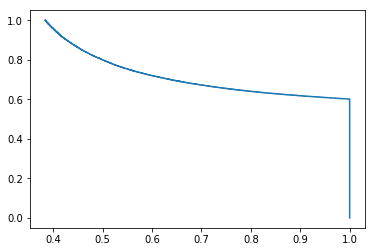

In [38]:
## P-R曲线
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y, y_pred)
plt.plot(precision, recall)

Text(0.5,0,'FPR')

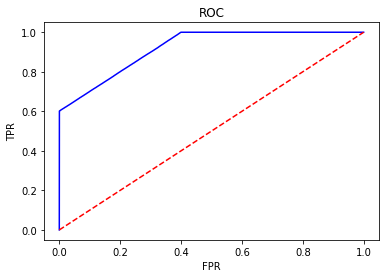

In [41]:
from sklearn.metrics import roc_curve
FPR,TPR,thresholds=roc_curve(y, y_pred)
plt.title('ROC')
plt.plot(FPR, TPR,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [42]:
## AUC
import numpy as np
from sklearn.metrics import roc_auc_score
print('AUC socre:',roc_auc_score(y, y_pred))

AUC socre: 0.9200183812868428


In [43]:
## KS值 在实际操作时往往使用ROC曲线配合求出KS值
from sklearn.metrics import roc_curve
FPR,TPR,thresholds=roc_curve(y, np.where(y_pred>0.5,1,0))
KS=abs(FPR-TPR).max()
print('KS值：',KS)

KS值： 0.6003373736099052


	最后提交了一下示例结果，score:0.5000